In [1]:
#1. #With the iris data given in class, implement train_test_split from scratch.
#2. Put everything into a class called LogisticRegression, this class should allow you choose any of the training methods you'd like including "batch", "minibatch" and "sto". However, if the input method is not one of the three, it should "raise ValueError".
#3. Calculate time taken to fit your models using different training methods.
#4. Perform a classification on the dataset using all 3 methods and also show what happens if your defined training method is not either "batch", "minibatch" or "sto". Make sure to plot the training losses.
#5. Simply, use classification_report from sklearn.metrics to evaluate your models.
#6. Discuss your results ie. training losses of the three methods and time taken to fit models.

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
#Prepare data
iris = datasets.load_iris()
X = iris.data[:,2:] #take first two features
y = iris.target #y has 3 classes so it requires multinomial
#feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [3]:
#data split
idx = np.arange(0,len(X),1)
np.random.shuffle(idx)
idx_train = idx[0:int(.7*len(X))]
idx_test = idx[len(idx_train):len(idx)]
X_train = X[idx_train]
X_test = X[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]

In [4]:
#add intercept to X
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis = 1) 
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis = 1)

In [5]:
k = len(set(y)) #num of class
m = X_train.shape[0] #num of samples
n = X_train.shape[1] #num of features 
Y_train_encoded = np.zeros((m,k))
for each_class in range(k):
    cond = y_train == each_class
    Y_train_encoded[np.where(cond), each_class] = 1

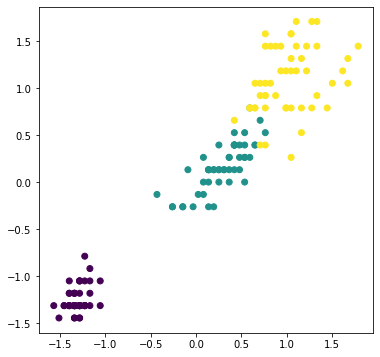

In [6]:
#visualize the data
plt.figure(figsize = (6,6))
plt.scatter(X[:,0], X[:,1], label = "class 0", c=y)
plt.show()

In [7]:
import time
class LogisticRegression:
    
    def __init__(self, k, n, method, alpha = 0.001, max_iter=10000):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')   
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y
        grad = self.softmax_grad(X, error)
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

Loss at iteration 0 0.973258337600073
Loss at iteration 500 0.19050188495248688
Loss at iteration 1000 0.14367474244312892
Loss at iteration 1500 0.12412529676469196
Loss at iteration 2000 0.11304746280251353
Loss at iteration 2500 0.10580113536624296
Loss at iteration 3000 0.10064772248558179
Loss at iteration 3500 0.09677681387209244
Loss at iteration 4000 0.09375517399108647
Loss at iteration 4500 0.09132819898842376
Loss at iteration 5000 0.0893354917191692
Loss at iteration 5500 0.08767047985749371
Loss at iteration 6000 0.0862593136211135
Loss at iteration 6500 0.0850490481043498
Loss at iteration 7000 0.08400064578810128
Loss at iteration 7500 0.08308463856037625
Loss at iteration 8000 0.08227833298777378
Loss at iteration 8500 0.08156394996596614
Loss at iteration 9000 0.08092735102017154
Loss at iteration 9500 0.0803571446807929
time taken: 0.6256923675537109
=========Classification report=======
Report:                precision    recall  f1-score   support

           0     

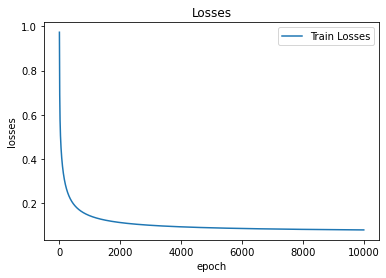

In [8]:
from sklearn.metrics import classification_report
model = LogisticRegression(k, X_train.shape[1], "batch")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

Loss at iteration 0 1.139296212155377
Loss at iteration 500 0.349767573503136
Loss at iteration 1000 0.2515784335770264
Loss at iteration 1500 0.24234257114631136
Loss at iteration 2000 0.1991147134341808
Loss at iteration 2500 0.1921242568543394
Loss at iteration 3000 0.185965720975192
Loss at iteration 3500 0.18037208064903976
Loss at iteration 4000 0.13250477014094011
Loss at iteration 4500 0.1265804335149018
Loss at iteration 5000 0.08339091980254758
Loss at iteration 5500 0.1714520559716914
Loss at iteration 6000 0.20939967264221632
Loss at iteration 6500 0.12396592269046675
Loss at iteration 7000 0.11364298159350161
Loss at iteration 7500 0.14178377010739052
Loss at iteration 8000 0.08446761866100988
Loss at iteration 8500 0.16290756362836636
Loss at iteration 9000 0.1624323116696105
Loss at iteration 9500 0.16005762508105298
time taken: 0.594573974609375
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       1.00 

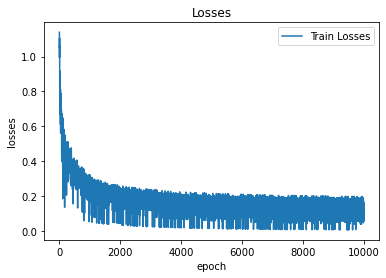

In [9]:
model = LogisticRegression(k, X_train.shape[1], "minibatch")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

Loss at iteration 0 1.1808305524506415
Loss at iteration 500 0.8664281362048429
Loss at iteration 1000 1.0204679163211674
Loss at iteration 1500 0.6428975797452073
Loss at iteration 2000 1.0295436412296721
Loss at iteration 2500 0.8850824464996039
Loss at iteration 3000 0.3218264916606757
Loss at iteration 3500 0.6558424434419259
Loss at iteration 4000 0.6503916744164193
Loss at iteration 4500 0.2842151361837322
Loss at iteration 5000 0.12717151210868952
Loss at iteration 5500 0.8017017667538228
Loss at iteration 6000 0.13814158662735423
Loss at iteration 6500 0.30769139752116337
Loss at iteration 7000 0.9350609566174377
Loss at iteration 7500 0.7444674659199958
Loss at iteration 8000 0.4645510888035167
Loss at iteration 8500 0.1256304819337481
Loss at iteration 9000 0.27319596771827337
Loss at iteration 9500 0.6397062712797535
time taken: 0.5482630729675293
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       1.00    

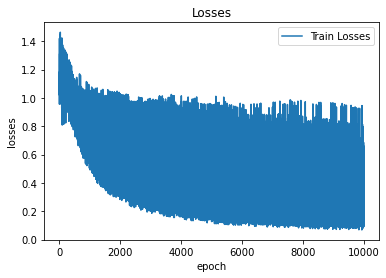

In [10]:
model = LogisticRegression(k, X_train.shape[1], "sto")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

In [13]:
model = LogisticRegression(k, X_train.shape[1], "python")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()

ValueError: Method must be one of the followings: "batch", "minibatch" or "sto".

6. Discuss your results ie. training losses of the three methods and time taken to fit models.

Batch method: It has the most smooth training losses graph as all training data is taken into consideration to take a single step. The time taken is by batch method is 0.62sec. 

Sto method: The graph is bit rough as it takes one row at a time to take a single step.

Mini-batch method: The training losses graph of this method is comparatively rough. Hoevever, it takes lesser time than both of the other methods. 